Link for course page - https://jovian.ai/learn/deep-learning-with-pytorch-zero-to-gans/lesson/lesson-1-pytorch-basics-and-linear-regression  
Link for video - https://www.youtube.com/watch?v=m_tkL7DufPk

In [3]:
import torch

At its core, PyTorch is a library for processing tensors. A tensor is a number, vector, matrix or any n-dimensional array. Let's create a tensor with a single number:

# 1 - PyTorch Basics: Tensors & Gradients

## 1.1 - Tensors

In [6]:
# Number
t1 = torch.tensor(4.)
t1

tensor(4.)

4. is a shorthand for 4.0. It is used to indicate to Python (and PyTorch) that you want to create a floating point number. We can verify this by checking the dtype attribute of our tensor:

In [9]:
t1.dtype

torch.float32

Let's try creating slightly more complex tensors:

In [12]:
# Vector
t2 = torch.tensor([1., 2, 3, 4])
t2

tensor([1., 2., 3., 4.])

In [18]:
t2.dtype

torch.float32

In [14]:
# Matrix
t3 = torch.tensor([[5., 6], 
                   [7, 8], 
                   [9, 10]])
t3

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [20]:
t3.dtype

torch.float32

In [16]:
# 3-dimensional array
t4 = torch.tensor([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]])
t4

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])

In [22]:
t4.dtype

torch.float32

Tensors can have any number of dimensions, and different lengths along each dimension. We can inspect the length along each dimension using the .shape property of a tensor.

In [25]:
print(t1)
t1.shape

tensor(4.)


torch.Size([])

In [27]:
print(t2)
t2.shape

tensor([1., 2., 3., 4.])


torch.Size([4])

In [29]:
print(t3)
t3.shape

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])


torch.Size([3, 2])

In [31]:
print(t4)
t4.shape

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])


torch.Size([2, 2, 3])

## 1.2 - Tensor operations and gradients

We can combine tensors with the usual arithmetic operations. Let's look an example:

In [38]:
# Create tensors.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)
x, w, b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

We've created 3 tensors x, w and b, all numbers. w and b have an additional parameter requires_grad set to True. We'll see what it does in just a moment.s:

Let's create a new tensor y by combining these tensors:

In [42]:
# Arithmetic operations
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

As expected, y is a tensor with the value 3 * 4 + 5 = 17. What makes PyTorch special is that we can automatically compute the derivative of y w.r.t. the tensors that have requires_grad set to True i.e. w and b. To compute the derivatives, we can call the .backward method on our result y.

In [45]:
# Compute derivatives
y.backward()

In [48]:
# Display gradients
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


As expected, dy/dw has the same value as x i.e. 3, and dy/db has the value 1. Note that x.grad is None, because x doesn't have requires_grad set to True.

The "grad" in w.grad stands for gradient, which is another term for derivative, used mainly when dealing with matrices.

## 1.3 - Interoperability with Numpy

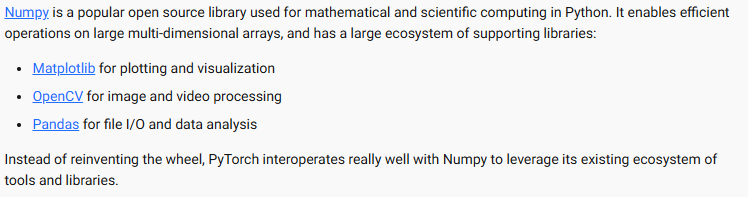

In [54]:
# Here's how we create an array in Numpy:
import numpy as np

x = np.array([[1, 2], [3, 4.]])
x

array([[1., 2.],
       [3., 4.]])

We can convert a Numpy array to a PyTorch tensor using torch.from_numpy.

In [57]:
# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

Let's verify that the numpy array and torch tensor have similar data types.

In [60]:
x.dtype, y.dtype

(dtype('float64'), torch.float64)

We can convert a PyTorch tensor to a Numpy array using the .numpy method of a tensor.

In [63]:
# Convert a torch tensor to a numpy array
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

The interoperability between PyTorch and Numpy is really important because most datasets you'll work with will likely be read and preprocessed as Numpy arrays.

# 2 - Gradient Descent and Linear Regression with PyTorch

## 2.1 - Introduction to Linear Regression

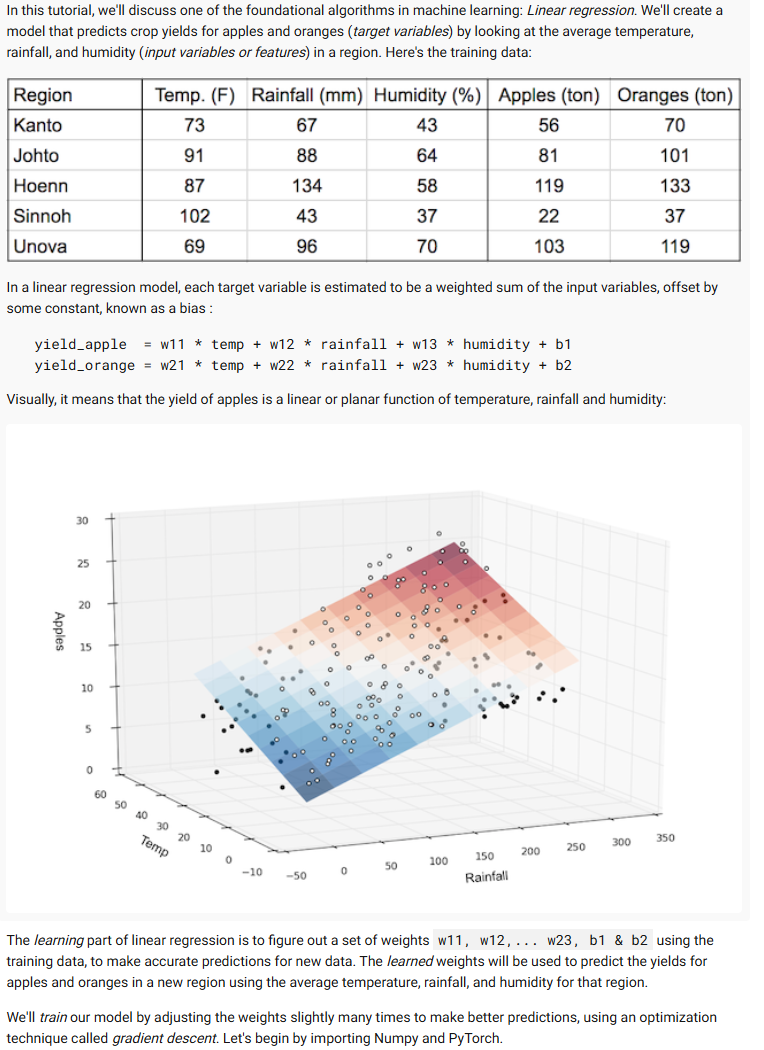

In [74]:
import numpy as np
import torch

## 2.2 - Training data

We can represent the training data using two matrices: inputs and targets, each with one row per observation, and one column per variable

In [193]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [195]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

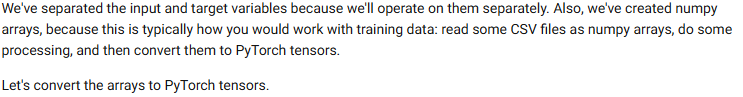

In [198]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


## 2.3 - Linear regression model from scratch


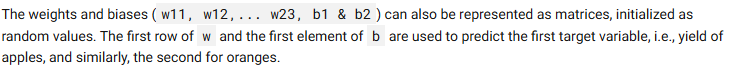

In [202]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True) # 2 rows and 3 columns
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-0.8779,  0.4804,  0.0789],
        [-1.3417,  1.0899,  0.9535]], requires_grad=True)
tensor([-0.5192,  1.0103], requires_grad=True)


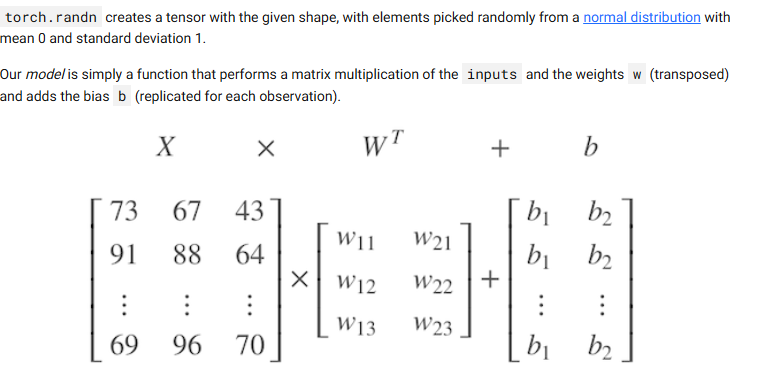

 ( 73*w11 + 67*w12 + 43*w13 + ...)

In [206]:
# We can define the model as follows:
def model(x):
    return x @ w.t() + b

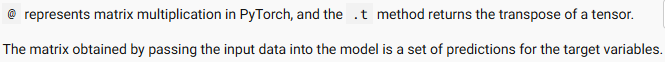

In [209]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[-29.0263,  17.0936],
        [-33.0835,  35.8553],
        [ -7.9487,  85.6358],
        [-66.4862, -53.6927],
        [ -9.4544,  79.8118]], grad_fn=<AddBackward0>)


In [211]:
# Let's compare the predictions of our model with the actual targets.
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


## 2.4 - Loss function

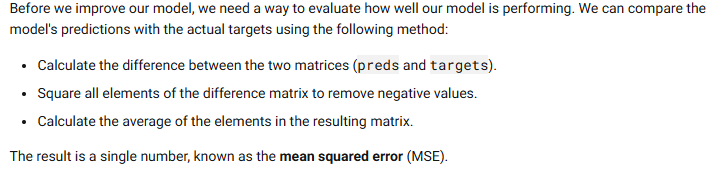

In [215]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

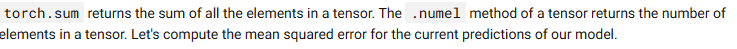

In [218]:
# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(7588.3413, grad_fn=<DivBackward0>)


Here’s how we can interpret the result: On average, each element in the prediction differs from the actual target by the square root of the loss. And that’s pretty bad, considering the numbers we are trying to predict are themselves in the range 50–200. The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

## 2.5 - Compute gradients

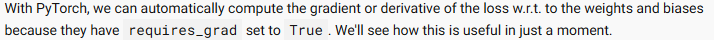

In [223]:
# Compute gradients
loss.backward()

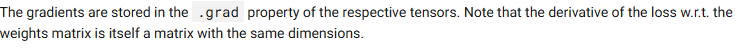

In [226]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[-0.8779,  0.4804,  0.0789],
        [-1.3417,  1.0899,  0.9535]], requires_grad=True)
tensor([[-8883.5977, -9469.5498, -5893.2578],
        [-5173.1309, -4657.2227, -3058.0317]])


In [228]:
print(b)
print(b.grad)

tensor([-0.5192,  1.0103], requires_grad=True)
tensor([-105.3998,  -59.0592])


## 2.6 - Adjust weights and biases to reduce the loss

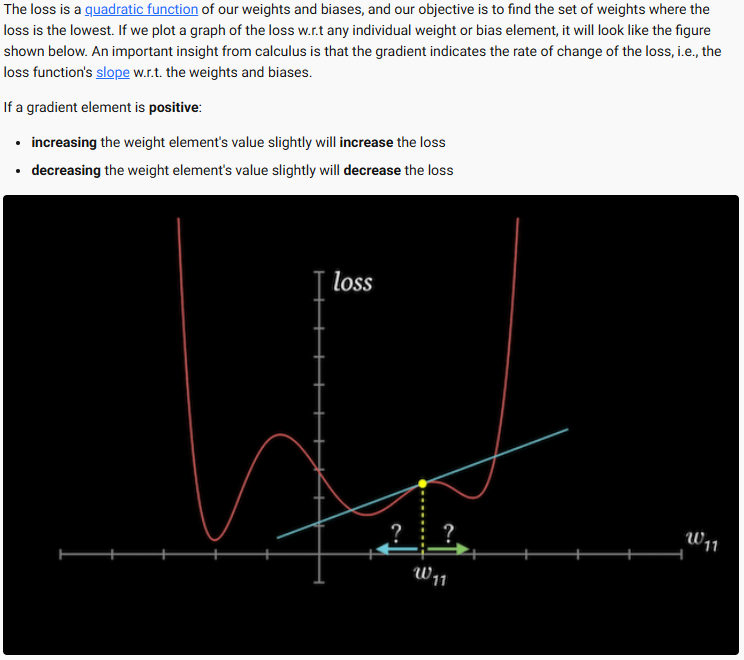

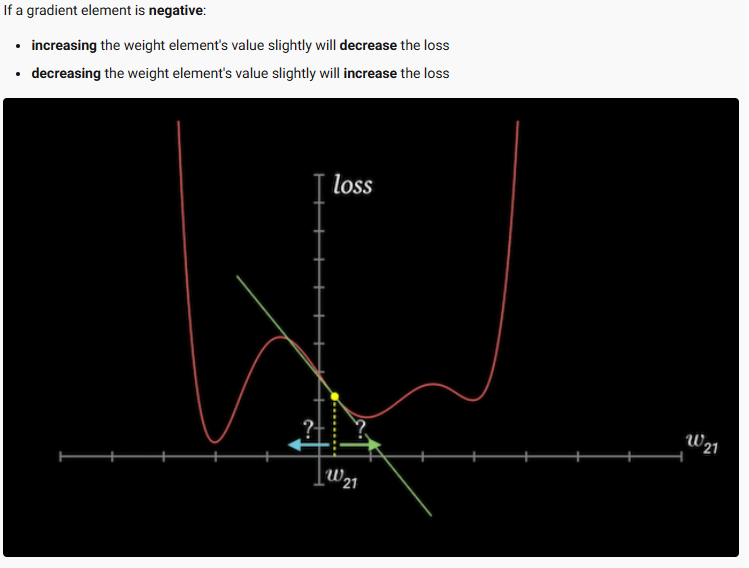

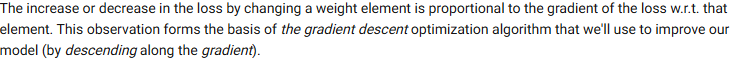

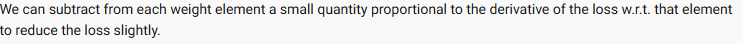

In [235]:
print(w)
print(w.grad)

tensor([[-0.8779,  0.4804,  0.0789],
        [-1.3417,  1.0899,  0.9535]], requires_grad=True)
tensor([[-8883.5977, -9469.5498, -5893.2578],
        [-5173.1309, -4657.2227, -3058.0317]])


In [246]:
with torch.no_grad(): # no_grad -> dont affect values while parameters are calculating
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5

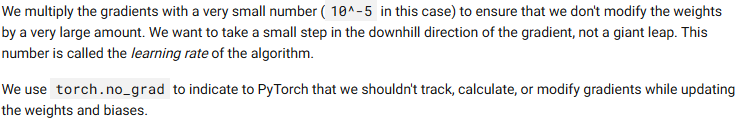

In [240]:
# Let's verify that the loss is actually lower
loss = mse(preds, targets)
print(loss)

tensor(7588.3413, grad_fn=<DivBackward0>)


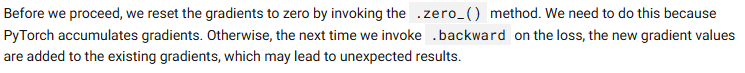

In [258]:
# Resetting gradients
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


## 2.7 - Train the model using gradient descent

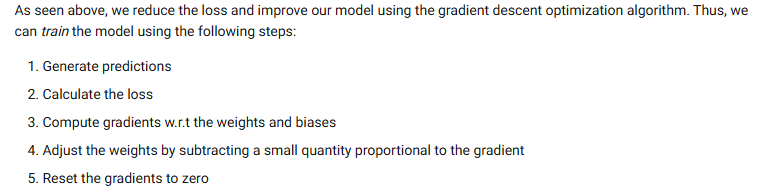

### 2.7.1 - Generate predictions

In [250]:
preds = model(inputs)
print(preds)

tensor([[-13.6615,  25.3058],
        [-12.8934,  46.6190],
        [ 15.8884,  98.1514],
        [-51.1714, -45.2814],
        [  9.8924,  89.9935]], grad_fn=<AddBackward0>)


### 2.7.2 - Calculate the loss

In [253]:
loss = mse(preds, targets)
print(loss)

tensor(5210.4697, grad_fn=<DivBackward0>)


### 2.7.3 - Compute gradients

In [256]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[-7297.6426, -7766.3203, -4841.9946],
        [-4327.4673, -3754.4976, -2499.6653]])
tensor([-86.5891, -49.0424])


### 2.7.4 - Adjust weights & 2.7.5 - Reset gradients

In [261]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [263]:
# Let's take a look at the new weights and biases.
print(w)
print(b)

tensor([[-0.7890,  0.5751,  0.1378],
        [-1.2899,  1.1365,  0.9841]], requires_grad=True)
tensor([-0.5182,  1.0109], requires_grad=True)


With the new weights and biases, the model should have a lower loss.

In [267]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(5210.4697, grad_fn=<DivBackward0>)


We have already achieved a significant reduction in the loss merely by adjusting the weights and biases slightly using gradient descent.

## 2.8 - Train for multiple epochs

To reduce the loss further, we can repeat the process of adjusting the weights and biases using the gradients multiple times. Each iteration is called an epoch. Let's train the model for 100 epochs.

In [272]:
# Train for 100 epochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

Once again, let's verify that the loss is now lower:

In [275]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(89.1831, grad_fn=<DivBackward0>)


The loss is now much lower than its initial value. Let's look at the model's predictions and compare them with the targets.

In [278]:
# Predictions
preds

tensor([[ 57.0031,  66.3209],
        [ 80.0362,  98.4597],
        [123.8888, 144.4006],
        [ 20.4316,  12.8970],
        [ 98.4221, 129.5670]], grad_fn=<AddBackward0>)

In [280]:
# Targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

The predictions are now quite close to the target variables. We can get even better results by training for a few more epochs.

## 2.9 - Linear regression using PyTorch built-ins

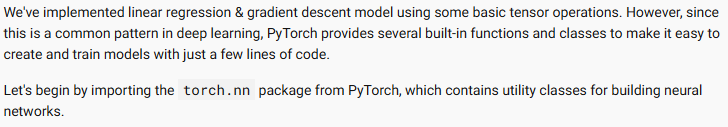

In [285]:
import torch.nn as nn

In [287]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [289]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]])

We are using 15 training examples to illustrate how to work with large datasets in small batches.

## 2.10 - Dataset and DataLoader

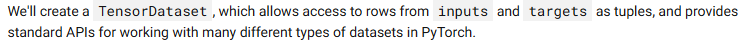

In [294]:
from torch.utils.data import TensorDataset

In [296]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

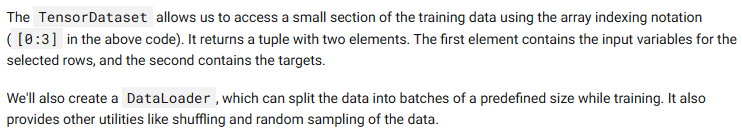

In [299]:
from torch.utils.data import DataLoader

In [301]:
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [303]:
# We can use the data loader in a for loop. Let's look at an example.
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 73.,  67.,  43.],
        [ 69.,  96.,  70.],
        [103.,  43.,  36.],
        [101.,  44.,  37.],
        [102.,  43.,  37.]])
tensor([[ 56.,  70.],
        [103., 119.],
        [ 20.,  38.],
        [ 21.,  38.],
        [ 22.,  37.]])


In each iteration, the data loader returns one batch of data with the given batch size. If shuffle is set to True, it shuffles the training data before creating batches. Shuffling helps randomize the input to the optimization algorithm, leading to a faster reduction in the loss.

## 2.11 - nn.Linear

Instead of initializing the weights & biases manually, we can define the model using the nn.Linear class from PyTorch, which does it automatically.

In [308]:
# Define model
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.0862,  0.4726,  0.3848],
        [ 0.4767, -0.5182, -0.4279]], requires_grad=True)
Parameter containing:
tensor([0.0238, 0.4767], requires_grad=True)


PyTorch models also have a helpful .parameters method, which returns a list containing all the weights and bias matrices present in the model. For our linear regression model, we have one weight matrix and one bias matrix.

In [311]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0862,  0.4726,  0.3848],
         [ 0.4767, -0.5182, -0.4279]], requires_grad=True),
 Parameter containing:
 tensor([0.0238, 0.4767], requires_grad=True)]

We can use the model to generate predictions in the same way as before.



In [314]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 54.5258, -17.8420],
        [ 74.0825, -29.1291],
        [ 93.1699, -52.3060],
        [ 43.3729,  10.9868],
        [ 78.2766, -46.3297],
        [ 54.1393, -16.8471],
        [ 73.9946, -29.0387],
        [ 93.6408, -52.2572],
        [ 43.7593,   9.9919],
        [ 78.5752, -47.2343],
        [ 54.4380, -17.7517],
        [ 73.6960, -28.1342],
        [ 93.2577, -52.3963],
        [ 43.0742,  11.8914],
        [ 78.6630, -47.3246]], grad_fn=<AddmmBackward0>)

## 2.12 - Loss Function

Instead of defining a loss function manually, we can use the built-in loss function mse_loss.

In [318]:
# Import nn.functional
import torch.nn.functional as F

The nn.functional package contains many useful loss functions and several other utilities.

In [321]:
# Define loss function
loss_fn = F.mse_loss

In [323]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(8876.5381, grad_fn=<MseLossBackward0>)


## 2.13 - Optimizer

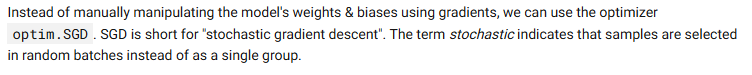

In [327]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

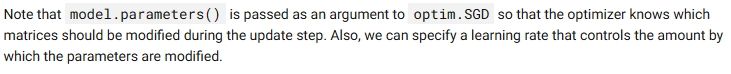

## 2.14 - Train the model

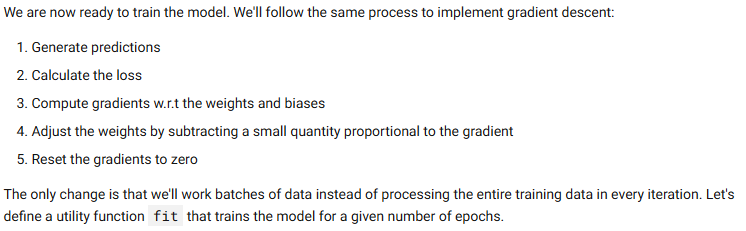

In [332]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

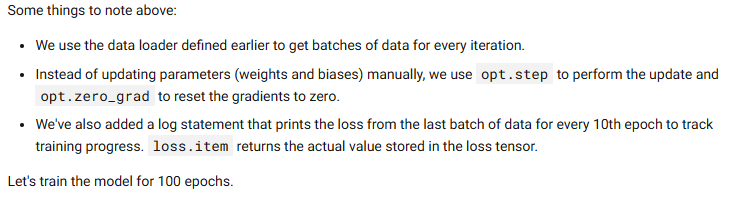

In [335]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 326.4179
Epoch [20/100], Loss: 479.1638
Epoch [30/100], Loss: 131.7217
Epoch [40/100], Loss: 18.9286
Epoch [50/100], Loss: 162.4450
Epoch [60/100], Loss: 122.6548
Epoch [70/100], Loss: 60.1421
Epoch [80/100], Loss: 49.9068
Epoch [90/100], Loss: 6.2834
Epoch [100/100], Loss: 42.9041


In [337]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 57.8738,  72.8358],
        [ 81.3568,  97.5101],
        [118.5944, 136.5386],
        [ 25.7547,  50.3864],
        [ 97.7832, 105.8986],
        [ 56.7270,  71.9659],
        [ 81.0248,  96.8998],
        [118.8188, 136.8301],
        [ 26.9015,  51.2563],
        [ 98.5982, 106.1582],
        [ 57.5419,  72.2255],
        [ 80.2099,  96.6402],
        [118.9264, 137.1489],
        [ 24.9397,  50.1269],
        [ 98.9301, 106.7685]], grad_fn=<AddmmBackward0>)

In [339]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

Indeed, the predictions are quite close to our targets. We have a trained a reasonably good model to predict crop yields for apples and oranges by looking at the average temperature, rainfall, and humidity in a region. We can use it to make predictions of crop yields for new regions by passing a batch containing a single row of input.

In [342]:
model(torch.tensor([[75, 63, 44.]]))

tensor([[54.3965, 69.6001]], grad_fn=<AddmmBackward0>)

The predicted yield of apples is 54.3 tons per hectare, and that of oranges is 68.3 tons per hectare.

## 2.15 - Machine Learning vs. Classical Programming

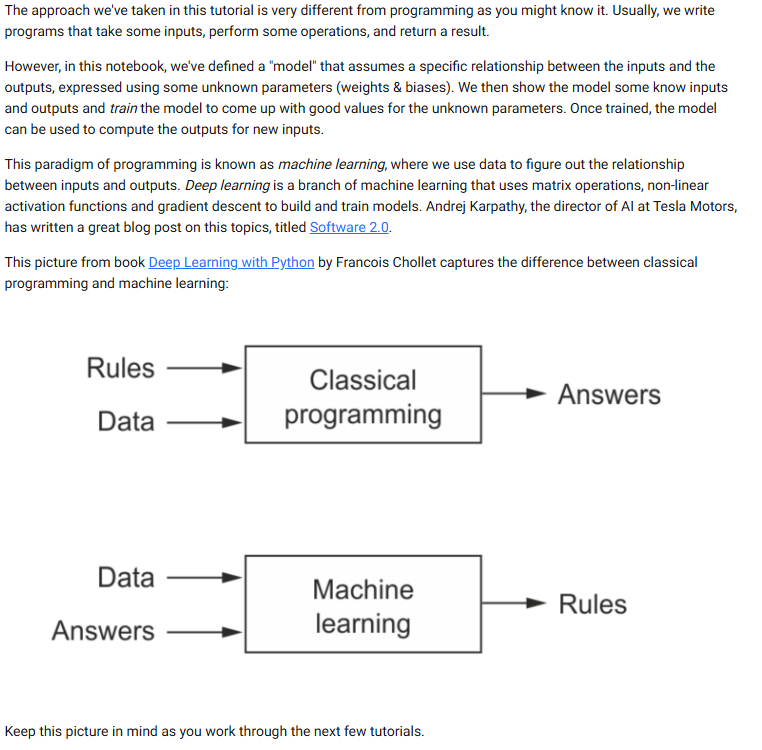

## 2.16 - Questions for Review

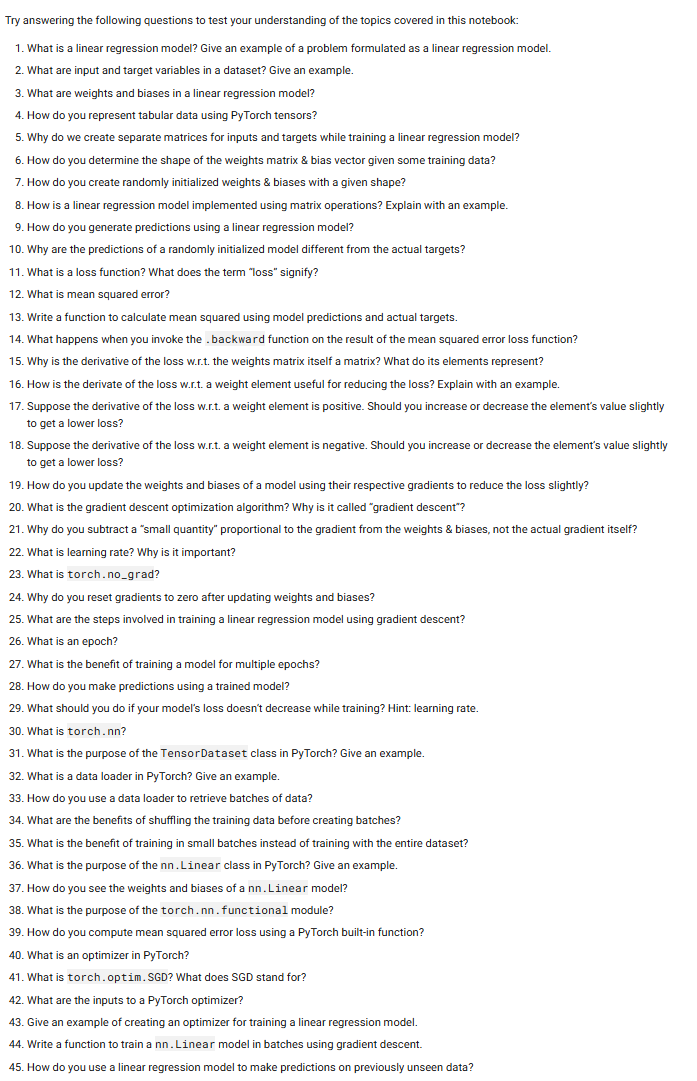

# 3 - Introduction to Machine Learning

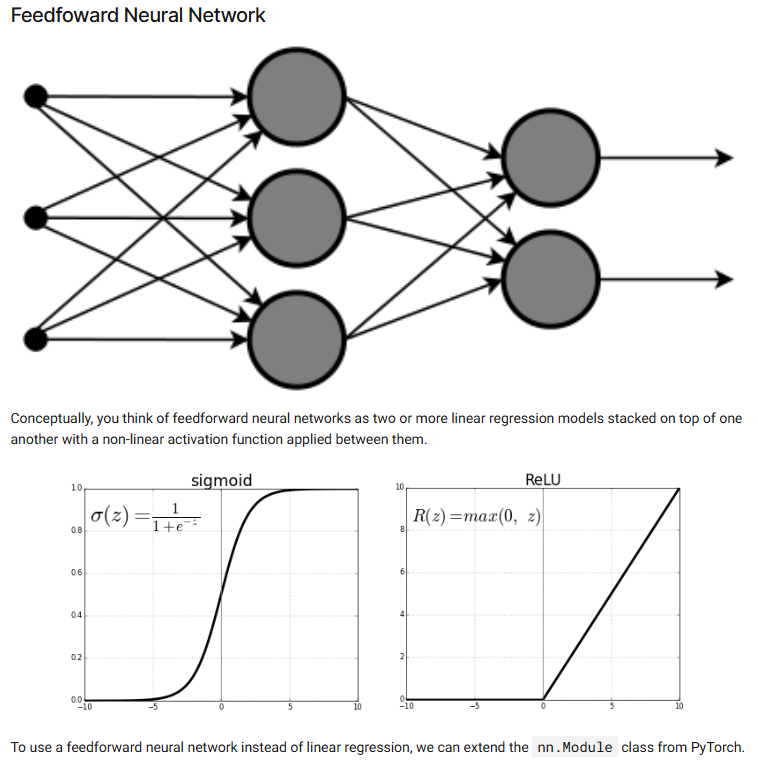